## Develop a simple linear regression model using one variable
Link to the Youtube video tutorial: https://www.youtube.com/watch?v=KfnhNlD8WZI&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=5


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Training data preparation
Load the data (training data) available in the CSV file into pandas data frame

In [43]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Visualization of training data 
Plot a scatter plot to get an idea on distribution of the data points (data loaded into the pandas data frame)

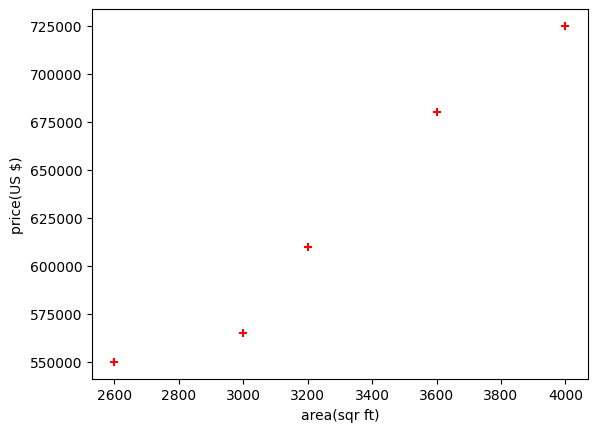

In [44]:
%matplotlib inline
plt.xlabel('area(sqr ft)') # Label the x-axis of the scatter plot
plt.ylabel('price(US $)') # Label the y-axis of the scatter plot
plt.scatter(df.area,df.price,color='red',marker='+') # Plot the area data (part of data loaded into the data frame) as x-axis, price data (part of data loaded into the data frame) as y-axis, set data point colour as red, set data point appearance as +

### Train a linear regression model with training data available

In [45]:
model = linear_model.LinearRegression() # create an object for linear regression 
model.fit(df[['area']], df.price) # train the linear regression model with available data (fit the data). The first argument (independent variable of training data) has to be 2D array. Here, the first argument is a data frame which only contains area. The second argument/target variable (dependent variable of training data) is price.

LinearRegression()

Now this linear regression model is ready to make prediction over the dependent variable (EG: prices in this case). 
Here, we verify the trained model by using it to make a prediction over an independent data (EG: 3300 sqr ft).

In [46]:
model.predict([[3300]]) # Use the trained linear regression model to do prediction. The input/independent variable must be in 2D array, using [[]]. Here, this model predict the price based on area of 3300sqr ft

c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

### (Not related to linear regression model development: Extra information, can ignore this section)
When training a linear regression model, the model compute the coefficient(m) and intercept(b) of its linear equation based on the data available. The computed coefficient and intercept will be used to predict the dependent variable when an independent variable is given.

![title](hidden/photo.png)

In [47]:
model.coef_ # show the coefficient computed by the model during its training

array([135.78767123])

In [48]:
model.intercept_ # show the intercept computed by the trained model during its training

180616.43835616432

## Save the trained model into a file. Then load the trained model from the same file to make predictions
### Option 1) Using Joblib

If your model consists of large numpy arrays, using Joblib tends to be more efficient

However, Joblib and Pickle have the same functionality

In [49]:
import joblib

joblib.dump(model,'model_joblib') # save the trained model called model into a file called model_joblib

model_j = joblib.load('model_joblib') # load the trained model saved in the file called model_joblib to a variable called model_j. You can use trained model to make predictions for your problems by calling model_j now

print(model_j.predict([[3300]])) # show the prediction made by the trained model loaded from the file called model_joblib, based on the given independent variable value. The arugment of the predict() must have [[value]] because its format is 2D array.
print(model_j.coef_) # show the coefficient/weight of the independent variable of the loaded trained model
print(model_j.intercept_) # show the intercept of the loaded trained model


[628715.75342466]
[135.78767123]
180616.43835616432


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Option 2) Using Pickle

In [50]:
import pickle

# save the trained model
with open ('model_pickle','wb') as f: # model_pickle is the filename where the trained model is saved into. wb is the operation mode called write binary. f represents the operation to save the trained model into the specified filename using write binary operation 
    pickle.dump(model,f) # the trained model called model is saved into a file called model_pickle by inputing f as the second argument

# load the trained model
with open ('model_pickle','rb') as f: # rb means read binary
    model_p = pickle.load(f) # the trained model saved in the file called model_pickle is loaded to a variable called model_p. You can use trained model to make predictions for your problems by calling model_p now

# deploy the loaded trained model
print(model_p.predict([[3300]])) # show the prediction made by the trained model loaded from the file called model_pickle, based on the given independent variable value. The arugment of the predict() must have [[value]] because its format is 2D array. 
print(model_p.coef_) # show the coefficient/weight of the independent variable of the loaded trained model
print(model_p.intercept_) # show the intercept of the loaded trained model




[628715.75342466]
[135.78767123]
180616.43835616432


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
